<a href="https://colab.research.google.com/github/jepowo/CPE_313/blob/main/CPE313_HOA1p3_Regularization_cpe32s8_DelaRosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:
y_train[333]

8

Check the actual image

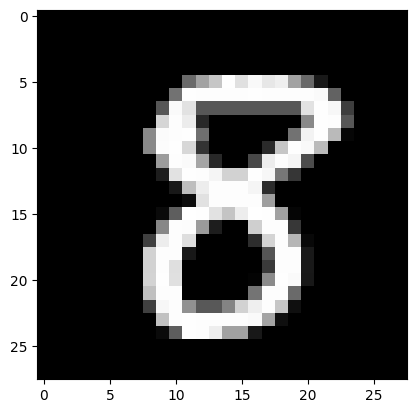

In [ ]:
plt.imshow(x_train[334], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.5110 - accuracy: 0.8485 - val_loss: 0.2113 - val_accuracy: 0.9354
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2563 - accuracy: 0.9254 - val_loss: 0.1565 - val_accuracy: 0.9535
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2051 - accuracy: 0.9385 - val_loss: 0.1338 - val_accuracy: 0.9615
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1750 - accuracy: 0.9488 - val_loss: 0.1238 - val_accuracy: 0.9638
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1588 - accuracy: 0.9524 - val_loss: 0.1185 - val_accuracy: 0.9657
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1434 - accuracy: 0.9563 - val_loss: 0.1050 - val_accuracy: 0.9687
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1347 - accuracy: 0.9596 - val_loss: 0.1049 - val_accuracy: 0.9686
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09538297355175018
Test accuracy: 0.9747999906539917


Interpret the result

### .

### The model achieved a test loss of 0.0954 and a test accuracy of 0.9748. This indicates that the model learned to effectively classify handwritten digits, with a very low loss and a high accuracy on unseen test data.

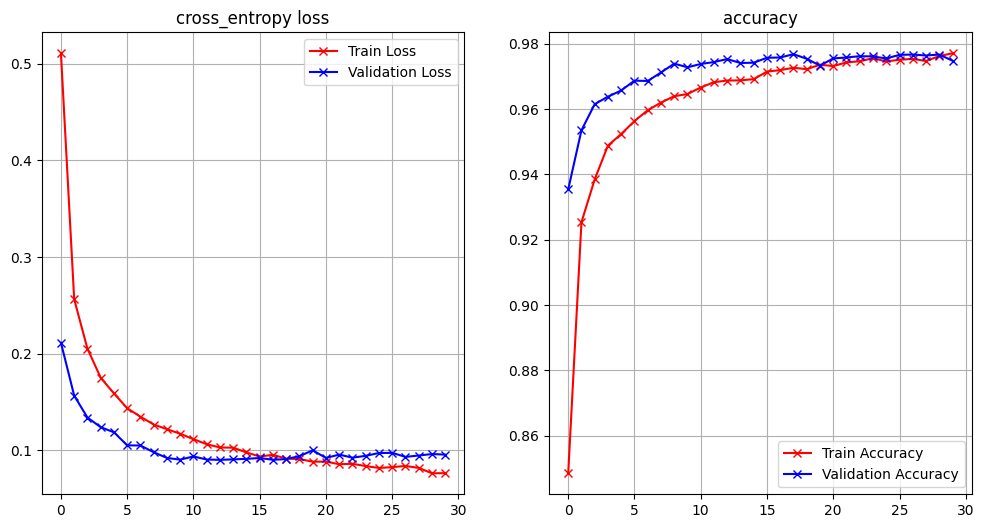

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

Interpret the result

### .

### The training loss has steadily decreased from around 0.5, which can indicate that the model is effectively learning to differentiate between digits. Now, the validation loss is similar to how it curves but reaches a plateau around 20 epochs, which may suggest that the model might be generalizing well to unseen data but has the possibility of overfitting due to the plateau. Good at training but mediocre at testing.

### The training accuracy rapidly increases from around 0.8, which demonstrates the model's ability to correctly classify digits during training. Then, the validation accuracy per se also shows a positive trend, reaching probably around 0.97, but again, plateaus after 15 epochs, which may suggest the model can accurately classify unseen data to a significant extent, but there is still room for improvement.



---



#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
model_1 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### .

### Previous Model = Total parameters: 55,050
### Model 1 = Total parameters: 437,310

### Model 1 has a significantly larger number of parameters compared to the previous model, primarily due to its larger hidden layers, which increase the complexity that may allow Model 1 to learn more intricate patterns in the data but also increase the risk of overfitting, which is why regularization techniques are applied.

In [ ]:
learning_rate = 0.001
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy'])
epochs = 20
batch_size = 128
history_model_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3299 - accuracy: 0.9003 - val_loss: 0.1229 - val_accuracy: 0.9625
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1497 - accuracy: 0.9549 - val_loss: 0.1053 - val_accuracy: 0.9684
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1160 - accuracy: 0.9654 - val_loss: 0.0843 - val_accuracy: 0.9742
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0996 - accuracy: 0.9703 - val_loss: 0.0761 - val_accuracy: 0.9779
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0910 - accuracy: 0.9732 - val_loss: 0.0744 - val_accuracy: 0.9784
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0804 - accuracy: 0.9760 - val_loss: 0.0692 - val_accuracy: 0.9806
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0736 - accuracy: 0.9782 - val_loss: 0.0714 - val_accuracy: 0.9814

In [ ]:
from keras import regularizers

model_2 = Sequential([
    Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
epochs = 20
batch_size = 128
history_model_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 1.5815 - accuracy: 0.8608 - val_loss: 0.5912 - val_accuracy: 0.9145
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.6182 - accuracy: 0.9054 - val_loss: 0.5069 - val_accuracy: 0.9356
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5717 - accuracy: 0.9140 - val_loss: 0.4916 - val_accuracy: 0.9353
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.5484 - accuracy: 0.9181 - val_loss: 0.4763 - val_accuracy: 0.9380
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5289 - accuracy: 0.9205 - val_loss: 0.4657 - val_accuracy: 0.9380
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5135 - accuracy: 0.9234 - val_loss: 0.4327 - val_accuracy: 0.9466
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.5014 - accuracy: 0.9272 - val_loss: 0.4291 - val_accuracy: 0.9478

In [ ]:
def plot_loss_accuracy(history_1, history_2):
    fig = plt.figure(figsize=(12, 8))

    # Plot Model 1 Loss
    ax = fig.add_subplot(2, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Model 1 Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Model 1 Validation Loss")
    ax.legend()
    ax.set_title('Model 1 Cross Entropy Loss')
    ax.grid(True)

    # Plot Model 1 Accuracy
    ax = fig.add_subplot(2, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Model 1 Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Model 1 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 1 Accuracy')
    ax.grid(True)

    # Plot Model 2 Loss
    ax = fig.add_subplot(2, 2, 3)
    ax.plot(history_2.history["loss"],'r-x', label="Model 2 Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Model 2 Validation Loss")
    ax.legend()
    ax.set_title('Model 2 Cross Entropy Loss')
    ax.grid(True)

    # Plot Model 2 Accuracy
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(history_2.history["accuracy"],'r-x', label="Model 2 Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Model 2 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 2 Accuracy')
    ax.grid(True)

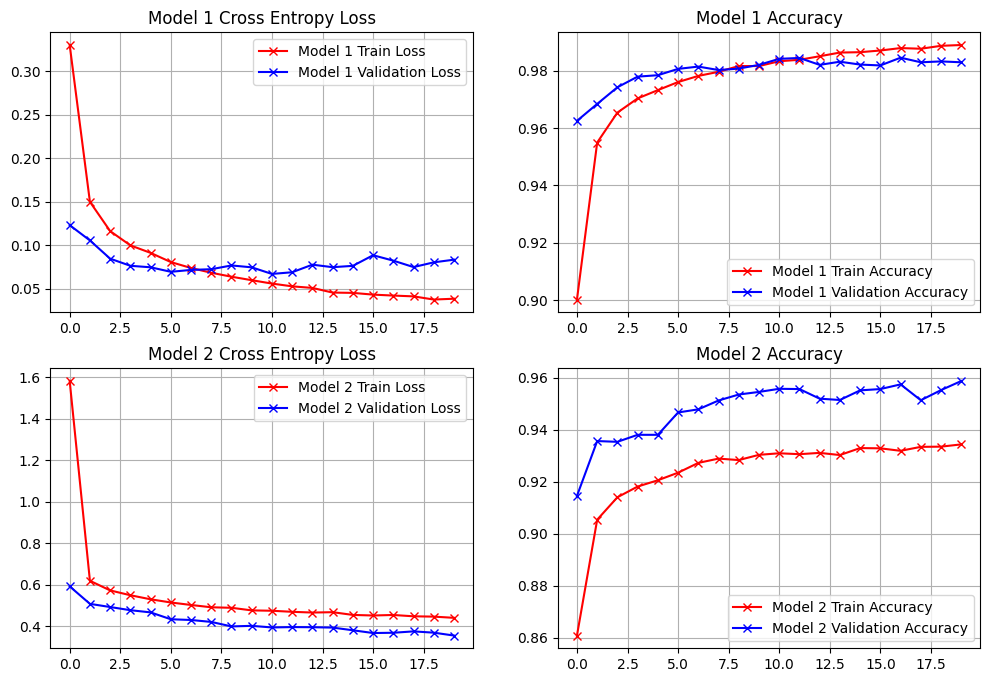

In [ ]:
plot_loss_accuracy(history_model_1, history_model_2)

Model 1:
Loss: Train loss steadily decreases and reaches a minimum around epoch 5. Validation loss shows a similar trend but stabilizes at a slightly higher value.
Accuracy: Train accuracy rapidly increases to near 100%. Validation accuracy also increases but plateaus at around less than 0.99.

Model 2 (with L2 regularization):
Loss: Train loss and validation loss curves are closer together compared to Model 1, suggesting less overfitting. Both curves decrease throughout training but at a slower rate than Model 1.
Accuracy: Train accuracy increases similarly to Model 1 but plateaus at a slightly lower value at around 0.93. Validation accuracy also increases but stabilizes at around barely 0.96, lower than Model 1.

#### Conclusion

# .

### Based on the data, Model 2 with L2 regularization appears to be the better choice due to its reduced overfitting and ability to generalize well to unseen data while maintaining similar validation accuracy. Overall, we built and compared two models to recognize handwritten digits. The first model learned quickly but might have memorized the training data a little too well. The second model used a regularization technique to learn in a more general way. Both did well, but the second model might work better on new data it hasn't seen before. So, using regularization techniques can probably help build better models.